In [1]:
import random
import numpy as np
from dataclasses import dataclass
import csv



@dataclass
class Conf:
    start: float
    end: float
    interval: float
    half_curve: bool = False

def get_exponential_weights(size: int, start: int = 0.2, end: int = 1.5, half_cure: bool = False) -> list[float]:
    def get_exponential_curve(start, end, size):
        x = np.linspace(start, end, size)
        y = 1 - np.exp(-x)
        return list(y)
    if half_cure is False:
        curve = get_exponential_curve(start, end, int(size/2))
        if size%2 == 0: return curve+curve[::-1]
        else: return curve+[curve[-1]]+curve[::-1]
    else:
        curve = get_exponential_curve(start, end, size) 
        return curve

def generate_cell(values: list, half_curve: bool = False):
    return random.choices(
        population=values,
        weights=get_exponential_weights(len(values), half_cure=half_curve)
    )[0]

def generate_row(params: list[Conf | list | str | int | float]):
    row = list()
    for conf in params:
        if type(conf) == Conf:
            range = np.arange(conf.start, conf.end+1, conf.interval).round(2).tolist()
            cell = generate_cell(range, half_curve=conf.half_curve)
            row.append(cell)
        elif type(conf) == list:
            cell = generate_cell(conf)
            row.append(cell)
        elif type(conf) == int or type(conf) == float or type(conf) == str: row.append(conf)
        else: raise Exception(f'Unknown param type for: {conf}')
    return row



def draw_weights_graph(weights: list):
    import matplotlib.pyplot as plt
    x = range(len(weights))
    y = weights

    plt.plot(x, y, linestyle='--', marker='o')
    plt.title('Weightage Style')
    plt.show()

In [2]:
'''
This demonstrates how the weightage is distributed. We are creating 1000 cells and 
the values 3 and 4 are populated around 256 times and the values 2 and 5 are populated 
around 198 times and the remaining values 1 and 6 are populated around 56 times.
'''

import collections
collections.Counter([generate_cell([1, 2, 3, 4, 5, 6]) for _ in range(1000)])
collections.Counter([generate_cell([96, 97, 98, 99, 100, 101]) for _ in range(1000)])

Counter({99: 257, 98: 245, 100: 200, 97: 176, 101: 62, 96: 60})

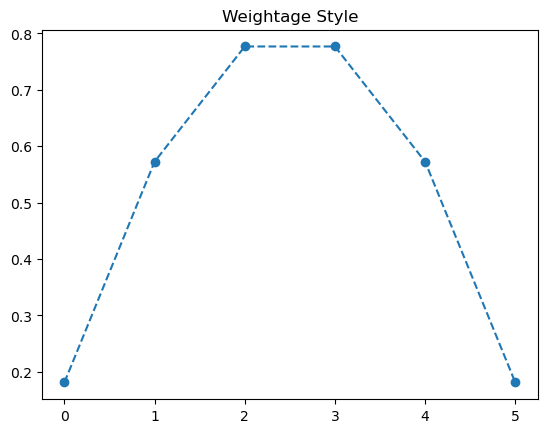

[0.18126924692201818, 0.5725850680512734, 0.7768698398515702, 0.7768698398515702, 0.5725850680512734, 0.18126924692201818]


In [6]:
'''
The below graph shows the weightage applied to the numbers. 
The curve can be tuned by modifying the "get_exponential_weights" method's parameters.
It is highly useful for calculating data that grows exponentially over time, 
it either has an increasing slope or a decreasing slope. 
i.e., it starts as a horizontal line and then it first increases/decreases slowly and then the growth/decay becomes rapid.
and this graph is used for temp, heart rate label
'''

draw_weights_graph(get_exponential_weights(6))
print(get_exponential_weights(6))

In [10]:
weights = get_exponential_weights(6)
scaled_weights = [i * 100 for i in weights]
print(scaled_weights)


[18.12692469220182, 57.25850680512734, 77.68698398515703, 77.68698398515703, 57.25850680512734, 18.12692469220182]


In [11]:
import numpy as np

# Given y-values and x-values
x = np.array([0, 16, 32, 48, 64, 80])
y = np.array([18.12692469220182, 57.25850680512734, 77.68698398515703, 77.68698398515703, 57.25850680512734, 18.12692469220182])

# Fit a quadratic polynomial
coefficients = np.polyfit(x, y, 2)  # 2 is for quadratic

# Display the coefficients
a, b, c = coefficients
print(f"The quadratic equation is: y = {a:.4f}x^2 + {b:.4f}x + {c:.4f}")


The quadratic equation is: y = -0.0387x^2 + 3.0957x + 18.0037


In [8]:
print(get_exponential_weights(6))

[0.18126924692201818, 0.5725850680512734, 0.7768698398515702, 0.7768698398515702, 0.5725850680512734, 0.18126924692201818, 0.18126924692201818, 0.5725850680512734, 0.7768698398515702, 0.7768698398515702, 0.5725850680512734, 0.18126924692201818, 0.18126924692201818, 0.5725850680512734, 0.7768698398515702, 0.7768698398515702, 0.5725850680512734, 0.18126924692201818, 0.18126924692201818, 0.5725850680512734, 0.7768698398515702, 0.7768698398515702, 0.5725850680512734, 0.18126924692201818, 0.18126924692201818, 0.5725850680512734, 0.7768698398515702, 0.7768698398515702, 0.5725850680512734, 0.18126924692201818, 0.18126924692201818, 0.5725850680512734, 0.7768698398515702, 0.7768698398515702, 0.5725850680512734, 0.18126924692201818, 0.18126924692201818, 0.5725850680512734, 0.7768698398515702, 0.7768698398515702, 0.5725850680512734, 0.18126924692201818, 0.18126924692201818, 0.5725850680512734, 0.7768698398515702, 0.7768698398515702, 0.5725850680512734, 0.18126924692201818, 0.18126924692201818, 0.

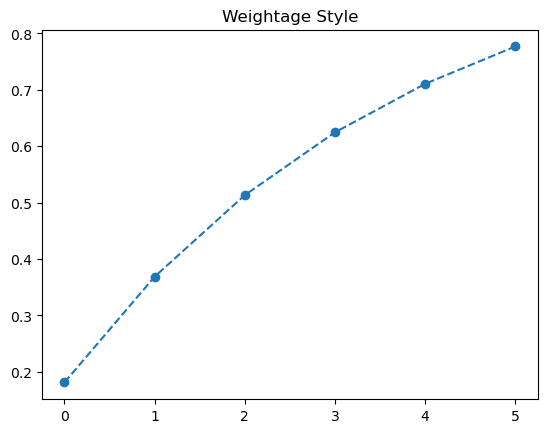

In [4]:
'''
Also a half curve weightage can be created using the following.
and this graph is used for oxy label
'''


draw_weights_graph(get_exponential_weights(6, half_cure=True))

In [5]:
'''
Looking at the below example, we can observe that while a row for 20 times, the distrubution
is seen below when using a half curve. The initial values starting from 1 - 3 has less population
while the values from 4 - 7 have medium population, where as the values from 8 - 10 have the highest
population. 
'''


generated_half_curve_values = [generate_row([Conf(1, 10, 1, True)]) for i in range(20)]
#                                                             ^
organized = [i[0] for i in generated_half_curve_values]
organized.sort()
organized

[1, 2, 2, 3, 4, 4, 5, 5, 6, 6, 6, 7, 7, 8, 8, 8, 9, 10, 10, 10]

In [6]:
# for number of days for deceased people

generated_half_curve_values = [generate_row([Conf(10, 30, 1, True)]) for i in range(30)]
#                                                             ^
organized = [i[0] for i in generated_half_curve_values]
organized.sort()
organized

[11,
 13,
 15,
 16,
 17,
 19,
 19,
 19,
 20,
 20,
 22,
 22,
 23,
 23,
 23,
 24,
 24,
 25,
 25,
 25,
 26,
 26,
 27,
 27,
 29,
 29,
 29,
 30,
 30,
 30]

In [14]:
'''
For a full curve, the population would be denser in the middle and less dense towards the end
'''
generated_half_curve_values = [generate_row([Conf(96, 98, 0.1)]) for i in range(10)]
organized = [i[0] for i in generated_half_curve_values] 
organized.sort()
organized = [min(i, 99) for i in organized]
organized


[96.6, 97.0, 97.0, 97.0, 97.6, 97.9, 97.9, 97.9, 97.9, 98.4]

In [7]:
'''
An inverted half curve can be simulated by reversing the numbers while also setting the
interval to a negative number / rational number. (for alive people)
'''
generated_half_curve_values = [generate_row([Conf(10, 0, -1, True)]) for i in range(20)]
organized = [i[0] for i in generated_half_curve_values]
organized.sort()
organized

[2, 2, 2, 2, 3, 3, 4, 4, 4, 4, 5, 5, 6, 7, 8, 8, 8, 9, 10, 10]

In [8]:
generated_half_curve_values = [generate_row([Conf(15, 1, -1, True)]) for i in range(30)]
organized = [i[0] for i in generated_half_curve_values]
organized.sort()
organized

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 8,
 8,
 9,
 9,
 9,
 10,
 10,
 11,
 13,
 14,
 14,
 15,
 15]

In [9]:
'''
Lets now create a row with this concept. Here we can either pass a 
config parameter of type Conf(start, end, interval) or list of needed values or a string or int.

This creates 950 rows of data for dead people
'''

#                          Number of days       Oxygen          Temperature         Heart Rate         status

dead = [generate_row([Conf(10, 30, 1, True), Conf(75, 95, 1, True), Conf(97, 105, 0.1), Conf(90, 120, 1), 'Not survived']) for _ in range(950)]
'''
                                                /     |    \
                                               /      |     \
                                              /       |      \
                                           start      end      interval
                                           value      value
'''


dead        


[[17, 88, 105.8, 100, 'Not survived'],
 [30, 91, 102.2, 105, 'Not survived'],
 [14, 92, 100.9, 107, 'Not survived'],
 [27, 90, 97.7, 113, 'Not survived'],
 [30, 88, 100.7, 95, 'Not survived'],
 [26, 81, 101.0, 118, 'Not survived'],
 [29, 89, 102.8, 99, 'Not survived'],
 [28, 80, 101.8, 115, 'Not survived'],
 [11, 85, 101.9, 110, 'Not survived'],
 [24, 93, 104.3, 107, 'Not survived'],
 [23, 81, 103.4, 105, 'Not survived'],
 [17, 92, 101.4, 109, 'Not survived'],
 [16, 86, 102.0, 116, 'Not survived'],
 [24, 82, 105.6, 105, 'Not survived'],
 [18, 91, 101.3, 120, 'Not survived'],
 [18, 94, 97.3, 95, 'Not survived'],
 [26, 95, 103.4, 97, 'Not survived'],
 [30, 86, 99.3, 98, 'Not survived'],
 [28, 90, 103.3, 109, 'Not survived'],
 [30, 81, 100.5, 104, 'Not survived'],
 [26, 88, 102.9, 106, 'Not survived'],
 [16, 80, 101.2, 98, 'Not survived'],
 [11, 94, 99.1, 90, 'Not survived'],
 [14, 95, 100.3, 109, 'Not survived'],
 [14, 94, 100.0, 103, 'Not survived'],
 [25, 84, 99.5, 94, 'Not survived'],

In [10]:
'''
And then for alive people 
'''
#                          Number of days          Oxygen            Temperature       Heart Rate       status

alive = [generate_row([Conf(15, 1, -1, True), Conf(92, 100, 1, True), Conf(96, 98, 0.1), Conf(60, 100, 1), 'Survived']) for _ in range(950)]  
alive

[[6, 100, 97.5, 79, 'Survived'],
 [12, 99, 98.0, 83, 'Survived'],
 [7, 99, 97.4, 78, 'Survived'],
 [3, 96, 96.3, 70, 'Survived'],
 [11, 100, 97.5, 73, 'Survived'],
 [12, 98, 97.4, 78, 'Survived'],
 [9, 93, 97.3, 96, 'Survived'],
 [12, 98, 97.7, 84, 'Survived'],
 [10, 99, 98.6, 96, 'Survived'],
 [6, 98, 98.4, 76, 'Survived'],
 [4, 100, 97.9, 90, 'Survived'],
 [3, 100, 97.9, 89, 'Survived'],
 [12, 96, 98.8, 66, 'Survived'],
 [6, 98, 97.5, 71, 'Survived'],
 [9, 100, 97.8, 96, 'Survived'],
 [12, 95, 96.2, 68, 'Survived'],
 [14, 96, 97.7, 66, 'Survived'],
 [5, 97, 98.0, 82, 'Survived'],
 [8, 93, 98.5, 77, 'Survived'],
 [5, 95, 97.2, 94, 'Survived'],
 [15, 100, 98.1, 93, 'Survived'],
 [11, 100, 97.6, 84, 'Survived'],
 [9, 97, 96.2, 79, 'Survived'],
 [8, 93, 96.1, 88, 'Survived'],
 [8, 100, 97.3, 98, 'Survived'],
 [4, 96, 96.9, 77, 'Survived'],
 [5, 99, 98.0, 75, 'Survived'],
 [3, 93, 98.7, 85, 'Survived'],
 [14, 93, 98.3, 60, 'Survived'],
 [8, 93, 98.5, 80, 'Survived'],
 [8, 97, 97.2, 77, 'S

In [11]:
'''
Lets generate some noise.
'''
#                           Number of days                            Oxygen            Temperature          Heart Rate          status

noise = [generate_row([Conf(1, 30, 1, True), Conf(40, 100, 1, True), Conf(96, 107, 0.1,), Conf(90, 120, 1,), ['Survived', 'Not survived']]) for _ in range(100)]
'''
                                                                                                                          ^
                                                                                                                          |
                                                                                          
                                                                                                                      This or that
'''
noise

[[26, 85, 102.5, 106, 'Not survived'],
 [11, 79, 105.5, 99, 'Survived'],
 [25, 85, 104.8, 99, 'Not survived'],
 [29, 63, 103.6, 102, 'Not survived'],
 [20, 61, 106.4, 99, 'Not survived'],
 [20, 90, 100.0, 118, 'Survived'],
 [19, 46, 96.0, 93, 'Survived'],
 [12, 43, 99.9, 113, 'Not survived'],
 [11, 54, 102.0, 96, 'Survived'],
 [27, 46, 100.9, 117, 'Survived'],
 [25, 70, 102.4, 91, 'Not survived'],
 [10, 54, 102.7, 107, 'Not survived'],
 [28, 80, 103.1, 105, 'Survived'],
 [7, 94, 106.7, 116, 'Not survived'],
 [25, 90, 98.7, 112, 'Not survived'],
 [15, 87, 105.0, 99, 'Not survived'],
 [13, 69, 103.1, 99, 'Not survived'],
 [17, 66, 103.0, 98, 'Survived'],
 [18, 58, 97.1, 102, 'Not survived'],
 [10, 69, 103.7, 119, 'Survived'],
 [24, 52, 97.6, 100, 'Not survived'],
 [24, 88, 97.1, 103, 'Not survived'],
 [13, 96, 97.4, 97, 'Not survived'],
 [24, 77, 101.6, 91, 'Not survived'],
 [16, 92, 101.8, 96, 'Survived'],
 [20, 77, 105.1, 116, 'Not survived'],
 [17, 93, 102.5, 105, 'Survived'],
 [26, 6

In [12]:
'''
Now we combine all of it and shuffle.
'''

combined = dead + alive + noise
random.shuffle(combined)
combined

[[17, 79, 103.3, 98, 'Not survived'],
 [3, 94, 96.5, 70, 'Survived'],
 [10, 96, 97.5, 65, 'Survived'],
 [24, 93, 104.6, 112, 'Not survived'],
 [17, 89, 100.9, 113, 'Not survived'],
 [7, 93, 98.4, 93, 'Survived'],
 [8, 97, 97.5, 78, 'Survived'],
 [22, 86, 103.9, 114, 'Not survived'],
 [20, 61, 106.4, 99, 'Not survived'],
 [23, 83, 99.7, 112, 'Not survived'],
 [14, 86, 100.2, 93, 'Not survived'],
 [9, 100, 97.7, 98, 'Survived'],
 [26, 92, 99.4, 97, 'Not survived'],
 [7, 100, 97.2, 66, 'Survived'],
 [10, 99, 98.6, 96, 'Survived'],
 [4, 92, 97.8, 95, 'Survived'],
 [20, 90, 100.9, 107, 'Not survived'],
 [3, 96, 98.6, 77, 'Survived'],
 [15, 83, 98.1, 104, 'Not survived'],
 [27, 91, 97.2, 91, 'Not survived'],
 [11, 100, 96.8, 64, 'Survived'],
 [26, 92, 100.5, 98, 'Not survived'],
 [26, 77, 100.1, 106, 'Not survived'],
 [3, 93, 96.8, 62, 'Survived'],
 [11, 94, 102.3, 97, 'Not survived'],
 [24, 86, 100.3, 107, 'Not survived'],
 [24, 93, 103.7, 106, 'Not survived'],
 [26, 94, 102.7, 102, 'Not su

In [13]:
# gen rows

def gen_data(size: int, noise_ratio: float = 0.1):
    noise = int(size * noise_ratio)
    alive = int((size - noise) / 2)
    dead = alive


    # dead patients with comorbidities
    dead_comor = int(dead * 0.75)
    dead_above_50 = int(dead_comor * 0.6)
    dead_between_40_50 = int(dead_comor * 0.3)
    dead_less_than_40 = int(dead_comor * 0.1)

#                                    Number of days           Oxygen        Temperature         Heart Rate            Age             Comor or not   status
    dead_data = [generate_row([Conf(10, 30, 1, True),Conf(95, 75, -1, True), Conf(97, 105, 0.1), Conf(90, 120, 1), Conf(50, 80, 1, True), 'Yes', 'Not Survived']) for _ in range(dead_above_50)]
    dead_data += [generate_row([Conf(10, 30, 1, True),Conf(95, 75, -1, True), Conf(97, 105, 0.1), Conf(90, 120, 1), Conf(40, 50, 1, True), 'Yes', 'Not Survived']) for _ in range(dead_between_40_50)]
    dead_data += [generate_row([Conf(10, 30, 1, True),Conf(95, 75, -1, True), Conf(97, 105, 0.1), Conf(90, 120, 1), Conf(20, 40, 1, True), 'Yes', 'Not Survived']) for _ in range(dead_less_than_40)]


    
    # dead patients with no comorbidities
    dead_no_comor = int(dead * 0.25)
    dead_no_comor_above_50 = int(dead_no_comor * 0.6)
    dead_no_comor_between_40_50 = int(dead_no_comor * 0.3)
    dead_no_comor_less_than_40 = int(dead_no_comor * 0.1)


    no_comor_dead_data = [generate_row([Conf(10, 30, 1, True), Conf(95, 75, -1), Conf(97, 105, 0.1), Conf(90, 120, 1), Conf(50, 80, 1, True), 'No', 'Not Survived']) for _ in range(dead_no_comor_above_50)]
    no_comor_dead_data += [generate_row([Conf(10, 30, 1, True),Conf(95, 75, -1), Conf(97, 105, 0.1), Conf(90, 120, 1), Conf(40, 50, 1, True), 'No', 'Not Survived']) for _ in range(dead_no_comor_between_40_50)]
    no_comor_dead_data += [generate_row([Conf(10, 30, 1, True),Conf(95, 75, -1), Conf(97, 105, 0.1), Conf(90, 120, 1), Conf(20, 40, 1, True), 'No', 'Not Survived']) for _ in range(dead_no_comor_less_than_40)]


  
    # alive patients with comorbidities
    alive_comor = int(alive * 0.15)
    alive_above_50 = int(alive_comor * 0.1)
    alive_between_40_50 = int(alive_comor * 0.3)
    alive_less_than_40 = int(alive_comor * 0.6)


    alive_data = [generate_row([Conf(15, 1, -1, True), Conf(92, 100, 1, True), Conf(96, 98, 0.1), Conf(60, 100, 1), Conf(80, 50, -1, True), 'Yes', 'Survived']) for _ in range(alive_above_50)]
    alive_data += [generate_row([Conf(15, 1, -1, True), Conf(92, 100, 1, True), Conf(96, 98, 0.1), Conf(60, 100, 1), Conf(50, 40, -1, True), 'Yes', 'Survived']) for _ in range(alive_between_40_50)]
    alive_data += [generate_row([Conf(15, 1, -1, True), Conf(92, 100, 1, True), Conf(96, 98, 0.1), Conf(60, 100, 1), Conf(40, 20, -1, True), 'Yes', 'Survived']) for _ in range(alive_less_than_40)]



    # alive patients with no comorbidities
    alive_no_comor = int(alive * 0.85)
    alive_no_comor_above_50 = int(alive_no_comor * 0.1)
    alive_no_comor_between_40_50 = int(alive_no_comor * 0.3)
    alive_no_comor_less_than_40 = int(alive_no_comor * 0.6)




    no_comor_alive_data = [generate_row([Conf(15, 1, -1),Conf(92, 100, 1), Conf(96, 98, 0.1), Conf(60, 100, 1), Conf(80, 50, -1, True), 'No', 'Survived']) for _ in range(alive_no_comor_above_50)]
    no_comor_alive_data += [generate_row([Conf(15, 1, -1),Conf(92, 100, 1), Conf(96, 98, 0.1), Conf(60, 100, 1), Conf(50, 40, -1, True), 'No', 'Survived']) for _ in range(alive_no_comor_between_40_50)]
    no_comor_alive_data += [generate_row([Conf(15, 1, -1),Conf(92, 100, 1), Conf(96, 98, 0.1), Conf(60, 100, 1), Conf(40, 20, -1, True), 'No', 'Survived']) for _ in range(alive_no_comor_less_than_40)]





    # Conf is replaced with random because Conf outputs a weighted output which is not what noise means. Random gives out an evenly distributed raodnm noise.
    # noise patients                                                          
    noise_data = [generate_row([random.randint(1, 30), random.randint(75, 100), round(random.uniform(96, 105), 1),  random.randint(60, 120), random.randint(20, 80), ['Yes', 'No'], ['Survived', 'Not Survived']]) for _ in range(noise)]






    
    data = dead_data + no_comor_dead_data + alive_data + no_comor_alive_data + noise_data
    random.shuffle(data)


    return data







# Generate data 
data = gen_data(2000)







# Write data to CSV
with open('data.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Patient Number', 'Number Of Days', 'Oxygen', 'Temperature', 'Heart Rate', 'Age', 'Comorbidities', 'Status Of Patient'])
    for idx, row in enumerate(data, start=1):
        writer.writerow([idx] + row)

print("CSV file has been generated successfully.")

data

CSV file has been generated successfully.


[[16, 89, 100.6, 112, 39, 'Yes', 'Not Survived'],
 [26, 85, 100.4, 113, 48, 'Yes', 'Not Survived'],
 [18, 95, 97.6, 108, 78, 'Yes', 'Not Survived'],
 [30, 89, 103.0, 92, 57, 'Yes', 'Not Survived'],
 [6, 94, 96.4, 89, 27, 'Yes', 'Survived'],
 [20, 91, 97.6, 102, 79, 'Yes', 'Not Survived'],
 [18, 91, 100.4, 115, 39, 'No', 'Not Survived'],
 [10, 96, 98.8, 75, 29, 'No', 'Survived'],
 [18, 88, 101.7, 98, 75, 'No', 'Not Survived'],
 [7, 98, 97.4, 93, 34, 'No', 'Survived'],
 [11, 99, 96.9, 66, 24, 'No', 'Survived'],
 [22, 92, 98.6, 110, 49, 'Yes', 'Not Survived'],
 [3, 97, 97.5, 79, 57, 'Yes', 'Survived'],
 [25, 91, 97.6, 108, 50, 'No', 'Not Survived'],
 [11, 79, 102.7, 102, 71, 'No', 'Not Survived'],
 [19, 79, 104.3, 115, 66, 'Yes', 'Not Survived'],
 [27, 94, 98.5, 102, 22, 'Yes', 'Survived'],
 [13, 87, 102.5, 114, 37, 'No', 'Not Survived'],
 [14, 80, 99.8, 104, 60, 'Yes', 'Not Survived'],
 [16, 89, 102.5, 99, 45, 'No', 'Not Survived'],
 [19, 82, 100.1, 109, 73, 'Yes', 'Not Survived'],
 [27,